<a href="https://colab.research.google.com/github/Cannouo/OpenBot-1/blob/master/policy_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_OpenBot

/content/drive/MyDrive/Colab_OpenBot


In [ ]:
!unzip policy.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5128_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5129_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5130_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5131_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5132_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5133_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5134_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5135_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5136_crop.jpeg  
  inflating: policy/dataset/train_data/my_dataset_1/20220530_152728/images/5137_crop.jpeg  
  inflating: 

In [ ]:
%cd /content/drive/MyDrive/Colab_OpenBot/policy

/content/drive/MyDrive/Colab_OpenBot/policy


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

# On Mac you may encounter an error related to OMP, this is a workaround, but slows down the code
# https://github.com/dmlc/xgboost/issues/1715
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [ ]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.__version__

'2.8.0'

In [ ]:
from openbot import dataloader, data_augmentation, utils, train

## Set train and test dirs

Define the dataset directory and give it a name. Inside the dataset folder, there should be two folders, `train_data` and `test_data`. 

In [ ]:
dataset_dir = "dataset"
dataset_name = "my_openbot"
train_data_dir = os.path.join(dataset_dir, "train_data")
test_data_dir = os.path.join(dataset_dir, "test_data")

## Hyperparameters

You may have to tune the learning rate and batch size depending on your available compute resources and dataset. As a general rule of thumb, if you increase the batch size by a factor of n, you can increase the learning rate by a factor of sqrt(n). In order to accelerate training and make it more smooth, you should increase the batch size as much as possible. In our paper we used a batch size of 128. For debugging and hyperparamter tuning, you can set the number of epochs to a small value like 10. If you want to train a model which will achieve good performance, you should set it to 50 or more. In our paper we used 100.

In [ ]:
params = train.Hyperparameters()

params.MODEL = "pilot_net"
params.TRAIN_BATCH_SIZE = 16
params.TEST_BATCH_SIZE = 16
params.LEARNING_RATE = 0.0001
params.NUM_EPOCHS = 100
params.BATCH_NORM = True
params.FLIP_AUG = False
params.CMD_AUG = False
params.USE_LAST = False
params.WANDB = False

## Pre-process the dataset

In [ ]:
tr = train.Training(params)
tr.train_data_dir = train_data_dir
tr.test_data_dir = test_data_dir

Running this for the first time will take some time. This code will match image frames to the controls (labels) and indicator signals (commands).  By default, data samples where the vehicle was stationary will be removed. If this is not desired, you need to set `tr.remove_zeros = False`. If you have made any changes to the sensor files, changed `remove_zeros` or moved your dataset to a new directory, you need to set `tr.redo_matching = True`. 

In [ ]:
tr.redo_matching = False
tr.remove_zeros = True
train.process_data(tr)

Train Datasets:  2
Test Datasets:  1
Processing folder dataset/train_data/my_dataset_1/20220530_152728
 Frames and controls matched.
 Frames and commands matched.
 Removed timestamp: 446777414446206
 Removed timestamp: 446777480180898
 Removed timestamp: 446777552820898
 Removed timestamp: 446777622257898
 Removed timestamp: 446777691529821
 Removed timestamp: 446809085069823
 Removed timestamp: 446809156372284
 Removed timestamp: 446809221175746
 Removed timestamp: 446809292302823
 Removed timestamp: 446809355147361
 Removed timestamp: 446809417708054
 Removed timestamp: 446814489609823
 Removed timestamp: 446814548733592
 Removed timestamp: 446814605760054
 Removed timestamp: 446814867689516
 Removed timestamp: 446814936507054
 Removed timestamp: 446815005939131
 Removed timestamp: 446815075209823
 Removed timestamp: 446815146629285
 Removed timestamp: 446815218308592
 Removed timestamp: 446815359848900
 Removed timestamp: 446815417799669
 Removed timestamp: 446815477832977
 Removed 

In [ ]:
import threading


def broadcast(event, payload=None):
    print(event, payload)


event = threading.Event()
my_callback = train.MyCallback(broadcast, event)

In the next step, you can convert your dataset to a tfrecord, a data format optimized for training. You can skip this step if you already created a tfrecord before or if you want to train using the files directly. 

In [ ]:
train.create_tfrecord(my_callback)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
447151736614228,/content/drive/MyDrive/Colab_OpenBot/policy/dataset/train_data/my_dataset_1/20220530_152728/images/9009_crop.jpeg,128,128,0
447151795136920,/content/drive/MyDrive/Colab_OpenBot/policy/dataset/train_data/my_dataset_1/20220530_152728/images/9010_crop.jpeg,128,128,0
447151856139997,/content/drive/MyDrive/Colab_OpenBot/policy/dataset/train_data/my_dataset_1/20220530_152728/images/9011_crop.jpeg,128,128,0
447151920615459,/content/drive/MyDrive/Colab_OpenBot/policy/dataset/train_data/my_dataset_1/20220530_152728/images/9012_crop.jpeg,102,128,0
447151991760074,/content/drive/MyDrive/Colab_OpenBot/policy/dataset/train_data/my_dataset_1/20220530_152728/images/9013_crop.jpeg,0,128,0
447152051076613,/content/drive/MyDrive/Colab_OpenBot/policy/dataset/train_data/my_dataset_1/20220530_152728/images/9014_crop.jpeg,0,128,0
447152124881613,/content/drive/MyDrive/Colab_OpenBot/policy/dataset/train_data/my_dataset_1/20220

## Load the dataset

If you did not create a tfrecord and want to load and buffer files from disk directly, set `no_tf_record = True`.

In [ ]:
no_tf_record = False

In [ ]:
if no_tf_record:
    tr.train_data_dir = train_data_dir
    tr.test_data_dir = test_data_dir
    train.load_data(tr, verbose=0)
else:
    tr.train_data_dir = os.path.join(dataset_dir, "tfrecords/train.tfrec")
    tr.test_data_dir = os.path.join(dataset_dir, "tfrecords/test.tfrec")
    train.load_tfrecord(tr, verbose=0)

Image shape:  (96, 256, 3)
Command:  0.0
Label:  [0.5019608 0.5019608]
Number of training instances:  7434
Number of test instances:  2821


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

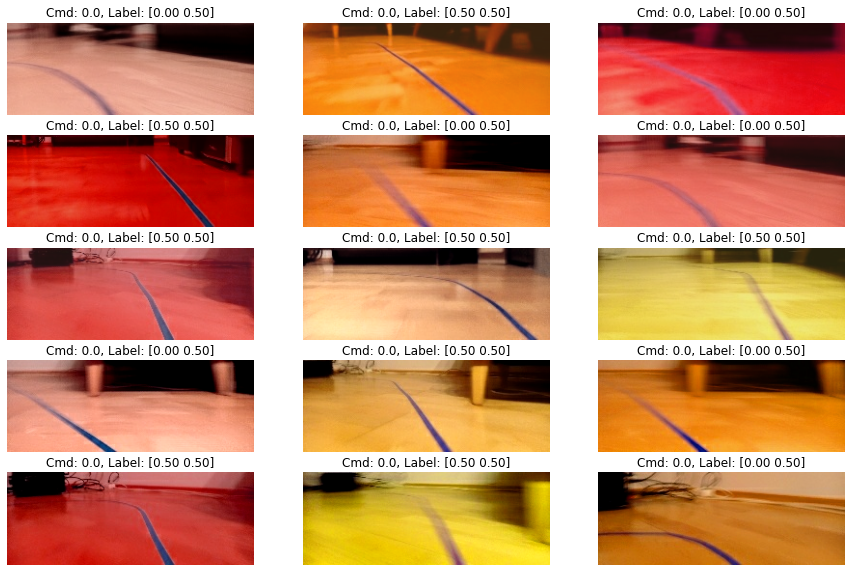

In [ ]:
(image_batch, cmd_batch), label_batch = next(iter(tr.train_ds))
utils.show_train_batch(image_batch.numpy(), cmd_batch.numpy(), label_batch.numpy())

## Training

In [ ]:
train.do_training(tr, my_callback, verbose=1)

model my_openbot_pilot_net_lr0.0001_bz16_bn
Model: "pilot_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 96, 256, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 46, 126, 24)  1824        ['img_input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 46, 126, 24)  96         ['conv2d[0][0]']                 
 alization)                                                                                       
                                              

## Evaluation

The loss and mean absolute error should decrease. This indicates that the model is fitting the data well. The custom metrics (direction and angle) should go towards 1. These provide some additional insight to the training progress. The direction metric measures weather or not predictions are in the same direction as the labels. Similarly the angle metric measures if the prediction is within a small angle of the labels. The intuition is that driving in the right direction with the correct steering angle is most critical part for good final performance.

In [ ]:
plt.plot(tr.history.history["loss"], label="loss")
plt.plot(tr.history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower right")
plt.savefig(os.path.join(tr.log_path, "loss.png"))

In [ ]:
plt.plot(tr.history.history["mean_absolute_error"], label="mean_absolute_error")
plt.plot(tr.history.history["val_mean_absolute_error"], label="val_mean_absolute_error")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="lower right")
plt.savefig(os.path.join(tr.log_path, "error.png"))

In [ ]:
plt.plot(tr.history.history["direction_metric"], label="direction_metric")
plt.plot(tr.history.history["val_direction_metric"], label="val_direction_metric")
plt.xlabel("Epoch")
plt.ylabel("Direction Metric")
plt.legend(loc="lower right")
plt.savefig(os.path.join(tr.log_path, "direction.png"))

In [ ]:
plt.plot(tr.history.history["angle_metric"], label="angle_metric")
plt.plot(tr.history.history["val_angle_metric"], label="val_angle_metric")
plt.xlabel("Epoch")
plt.ylabel("Angle Metric")
plt.legend(loc="lower right")
plt.savefig(os.path.join(tr.log_path, "angle.png"))

Save tf lite models for best and last checkpoint

In [ ]:
best_index = np.argmax(
    np.array(tr.history.history["val_angle_metric"])
    + np.array(tr.history.history["val_direction_metric"])
)
best_checkpoint = str("cp-%04d.ckpt" % (best_index + 1))
best_tflite = utils.generate_tflite(tr.checkpoint_path, best_checkpoint)
utils.save_tflite(best_tflite, tr.checkpoint_path, "best")
print(
    "Best Checkpoint (val_angle: %s, val_direction: %s): %s"
    % (
        tr.history.history["val_angle_metric"][best_index],
        tr.history.history["val_direction_metric"][best_index],
        best_checkpoint,
    )
)

In [ ]:
last_checkpoint = sorted(
    [
        d
        for d in os.listdir(tr.checkpoint_path)
        if os.path.isdir(os.path.join(tr.checkpoint_path, d))
    ]
)[-1]
last_tflite = utils.generate_tflite(tr.checkpoint_path, last_checkpoint)
utils.save_tflite(last_tflite, tr.checkpoint_path, "last")
print(
    "Last Checkpoint (val_angle: %s, val_direction: %s): %s"
    % (
        tr.history.history["val_angle_metric"][-1],
        tr.history.history["val_direction_metric"][-1],
        last_checkpoint,
    )
)

Evaluate the best model

In [ ]:
best_model = utils.load_model(
    os.path.join(tr.checkpoint_path, best_checkpoint),
    tr.loss_fn,
    tr.metric_list,
    tr.custom_objects,
)
test_loss, test_acc, test_dir, test_ang = best_model.evaluate(
    tr.test_ds,
    steps=tr.image_count_test / tr.hyperparameters.TEST_BATCH_SIZE,
    verbose=1,
)

In [ ]:
NUM_SAMPLES = 15
(image_batch, cmd_batch), label_batch = next(iter(tr.test_ds))
pred_batch = best_model.predict(
    (
        tf.slice(image_batch, [0, 0, 0, 0], [NUM_SAMPLES, -1, -1, -1]),
        tf.slice(cmd_batch, [0], [NUM_SAMPLES]),
    )
)
utils.show_test_batch(
    image_batch.numpy(), cmd_batch.numpy(), label_batch.numpy(), pred_batch
)

In [ ]:
utils.compare_tf_tflite(best_model, best_tflite)

## Save the notebook as HTML

In [ ]:
utils.save_notebook()
current_file = "policy_learning.ipynb"
output_file = os.path.join(tr.log_path, "notebook.html")
utils.output_HTML(current_file, output_file)